In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np
from scipy.integrate import odeint

The R value is: 1.0


<AxesSubplot:xlabel='day'>

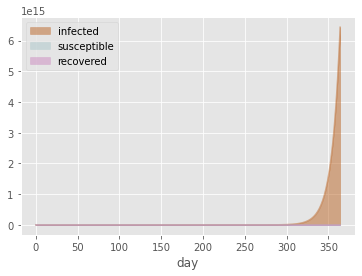

In [21]:
#the SIR model differential eq, source of code https://www.youtube.com/watch?v=ITUiX5Fpmm4
#equations from https://www.youtube.com/watch?v=NKMHhm2Zbkw

def derivative(state, t, N, alpha, beta):   #constants alpha(effective_contact_rate) and beta(recovery_rate)
    S, I, R = state #s,susceptible, I, infected, R, recovered(or dead) but either way immune
    #rate of change of S population
    dSdt = -alpha*S*I/N
    #rate of change of I population
    dIdt = beta * I
    #rate of change of R population
    dRdt = beta
    return dSdt, dIdt, dRdt

effective_contact_rate = 0.1 #transmission_rate * contact_rate #can choose this value, it will vary- compare to actual data to discover?
recovery_rate = 0.1 #1 / no_of_days #choose this value aswell

R_value = effective_contact_rate / recovery_rate
print('The R value is:', R_value)  #might aswell show this as its extra data


total_population = 56500000  #of England at beginning of 2020 https://www.statista.com/statistics/975956/population-of-england/
recovered = 0 #assuming Covid entered the UK at the beginning of 2020, not before, no current deaths or immuntiy
infected = 1 #patient 0
susceptible = total_population - infected - recovered

days = range(0,365) #just shows a year of infection, do we need to watch for leap years?

#use our SIR differential eq
ret = odeint(derivative,
            [susceptible, infected, recovered],
            days,
            args=(total_population, effective_contact_rate, recovery_rate))
S, I, R = ret.T

#data frame of the data on each day of a year, should create an 'admitted_to_hospital' row
#'admitted_to_hospital' based on proportion of infected people admitted that day?
df = pd.DataFrame({
    'susceptible' : S,
    'infected' : I,
    'recovered' : R,
    'day': days
})


#do a funky plot, this would hopefully be simulated hospital admissions compared to actual hospital admissions eventually
plt.style.use('ggplot')
df.plot(x='day',
       y=['infected','susceptible','recovered'],
       color = ('#bb6424', '#aac6ca', '#cc8ac0'),
       kind = 'area',
       stacked = False)




In [3]:
df

,susceptible,infected,recovered,day
0,5.650000e+07,1.000000e+00,0.0,0
1,5.650000e+07,1.221403e+00,0.2,1
2,5.650000e+07,1.491825e+00,0.4,2
3,5.650000e+07,1.822119e+00,0.6,3
4,5.650000e+07,2.225541e+00,0.8,4
...,...,...,...,...
360,-3.430598e-11,1.858680e+31,72.0,360
361,1.037493e-09,2.270197e+31,72.2,361
362,-3.590088e-12,2.772824e+31,72.4,362
363,1.077834e-11,3.386736e+31,72.6,363


In [5]:
df.to_csv('http://localhost:8888/tree/FCP-project-1/Basic_SIR_Data.csv', index = False)